In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('combined_rainfall_data.csv')

In [3]:
df["RAINFALL"] = df["RAINFALL"].fillna(0)

<Axes: >

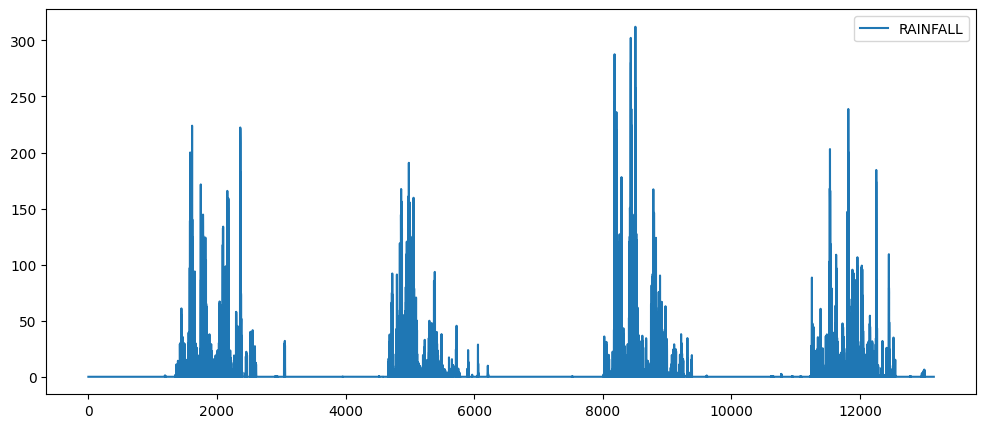

In [4]:
rain = pd.DataFrame(df["RAINFALL"])
rain.index.freq = 'MS'
rain.plot()


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose


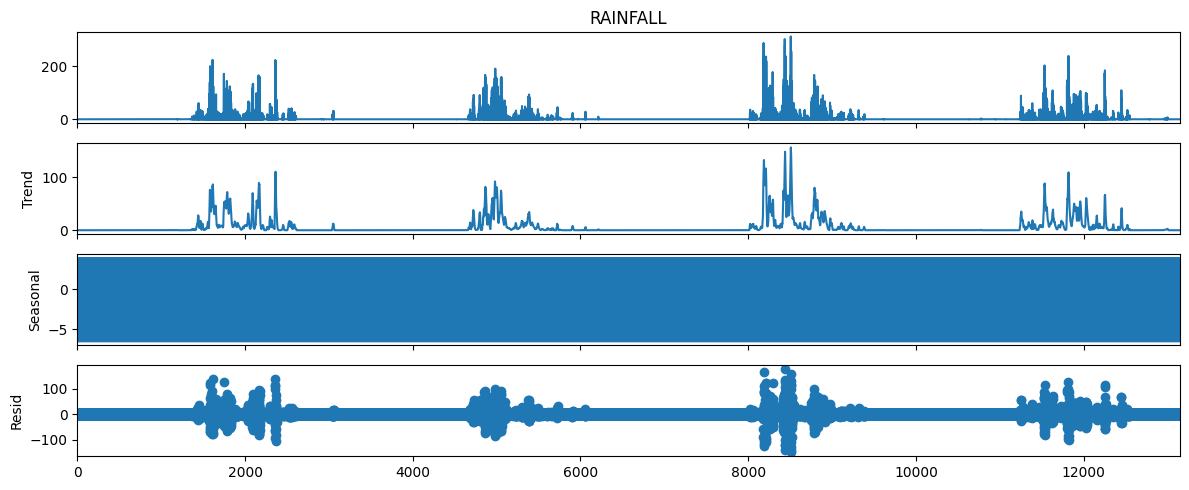

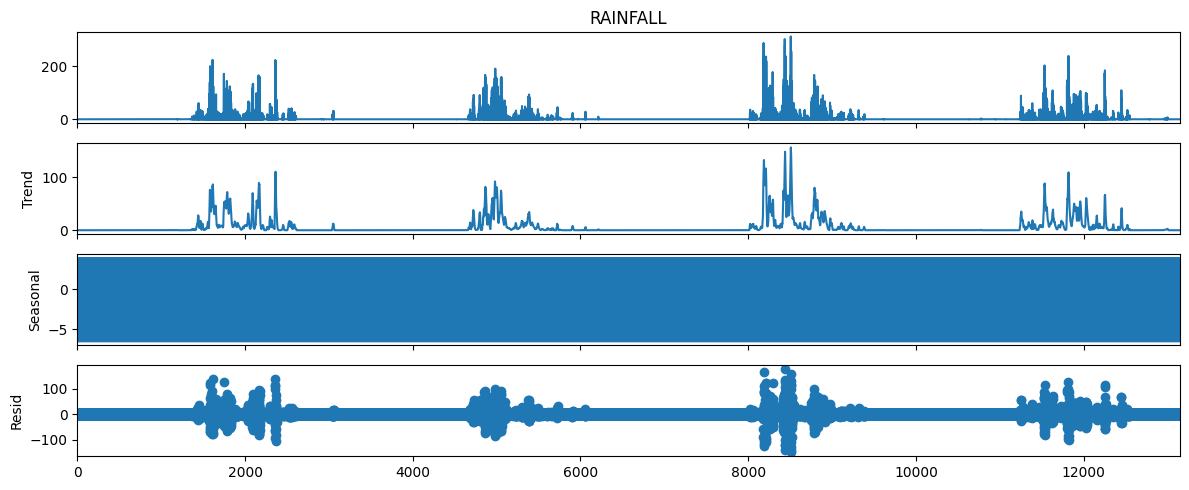

In [6]:
add = seasonal_decompose(rain["RAINFALL"],model='add',period = 12)
add.plot()

In [7]:
train_data = df.iloc[:9857,:]
test_data = df.iloc[9857:,:]

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [9]:
fitted_model = ExponentialSmoothing(train_data['RAINFALL'],trend='add',seasonal = "add",seasonal_periods=12).fit()

In [15]:
test_predictions = fitted_model.forecast(3292).rename('HW Forecast')
test_predictions

9857     0.005324
9858     0.006390
9859     0.008782
9860     0.011159
9861     0.012601
           ...   
13144    4.749323
13145    4.751339
13146    4.752405
13147    4.754798
13148    4.757174
Name: HW Forecast, Length: 3292, dtype: float64

<Axes: >

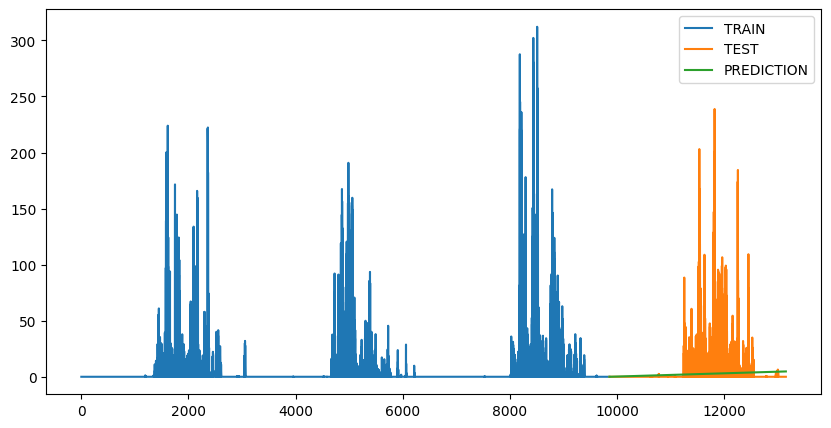

In [16]:
train_data['RAINFALL'].plot(legend=True,label='TRAIN')
test_data['RAINFALL'].plot(legend=True,label='TEST',figsize=(10,5))
test_predictions.plot(legend=True,label='PREDICTION')

<Axes: >

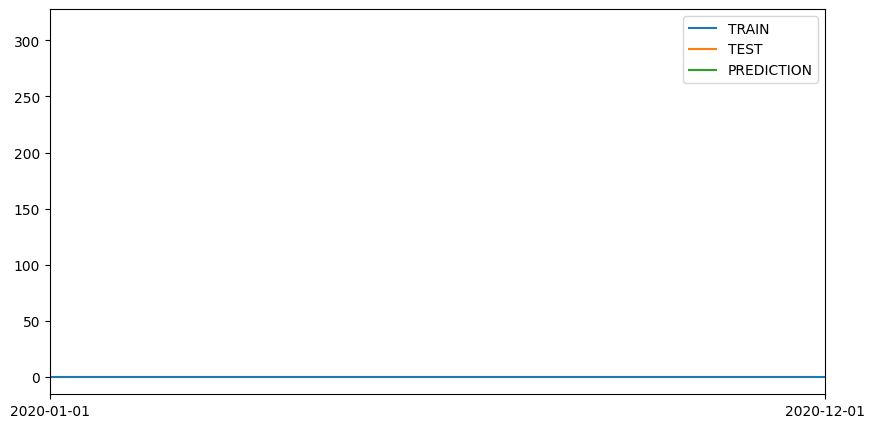

In [18]:
train_data['RAINFALL'].plot(legend=True,label='TRAIN')
test_data['RAINFALL'].plot(legend=True,label='TEST',figsize=(10,5))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-01-01','2020-12-01'])

In [19]:
def metrics(test_data,test_predictions):
    print("MAE: ",mean_absolute_error(test_data,test_predictions))
    print("MSE: ",mean_squared_error(test_data,test_predictions))
    print("RMSE: ",np.sqrt(mean_squared_error(test_data,test_predictions)))

In [20]:
metrics(test_data["RAINFALL"],test_predictions)


MAE:  7.100355882333169
MSE:  378.95163241327475
RMSE:  19.46668005627243


In [21]:
train_data = df


In [22]:
fitted_model = ExponentialSmoothing(train_data['RAINFALL'],
                                    trend='add',
                                    seasonal = "add",
                                    seasonal_periods=12).fit()
Forecast_exponential = fitted_model.forecast(12).rename('HW Forecast')

In [23]:
Forecast_exponential


13149   -0.074838
13150   -0.065734
13151   -0.082279
13152   -0.141823
13153   -0.067939
13154   -0.012589
13155   -0.092913
13156    0.014908
13157    0.055151
13158   -0.026224
13159    0.008209
13160    0.002288
Name: HW Forecast, dtype: float64

<Axes: >

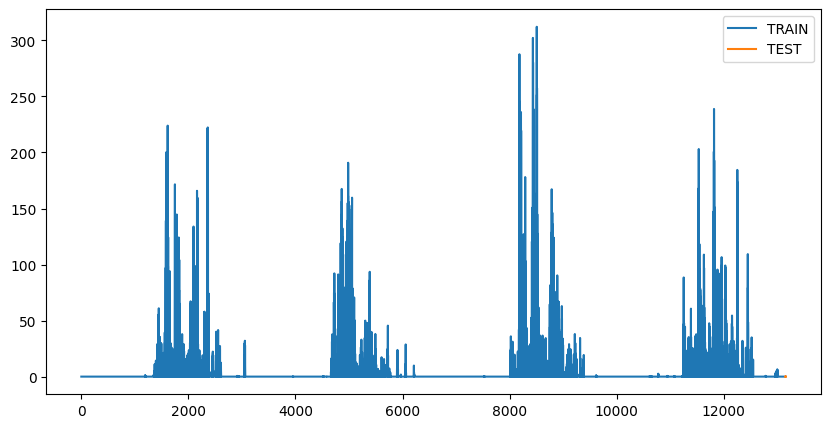

In [24]:
train_data['RAINFALL'].plot(legend=True,label='TRAIN')
Forecast_exponential.plot(legend=True,label='TEST',figsize=(10,5))

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [26]:
adf_test(rain,title='rain')


Augmented Dickey-Fuller Test: rain
ADF test statistic     -9.265351e+00
p-value                 1.371707e-15
# lags used             4.100000e+01
# observations          1.310700e+04
critical value (1%)    -3.430849e+00
critical value (5%)    -2.861761e+00
critical value (10%)   -2.566887e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


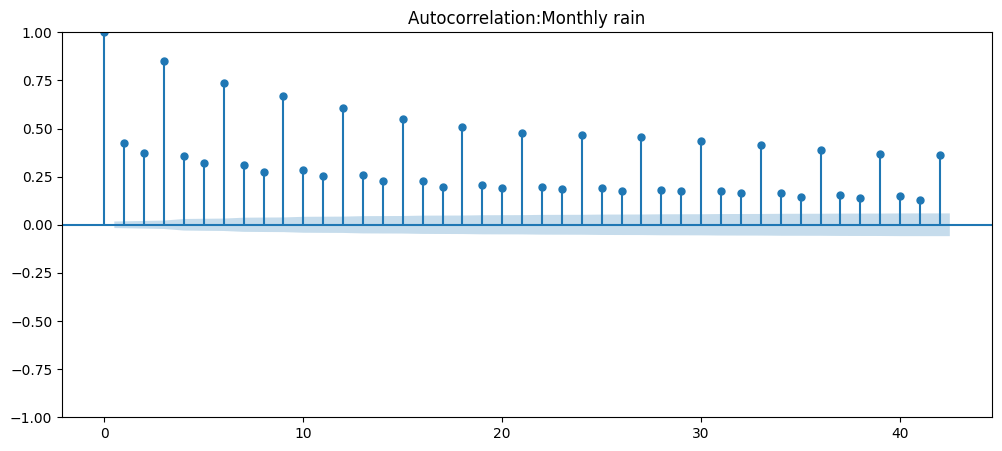

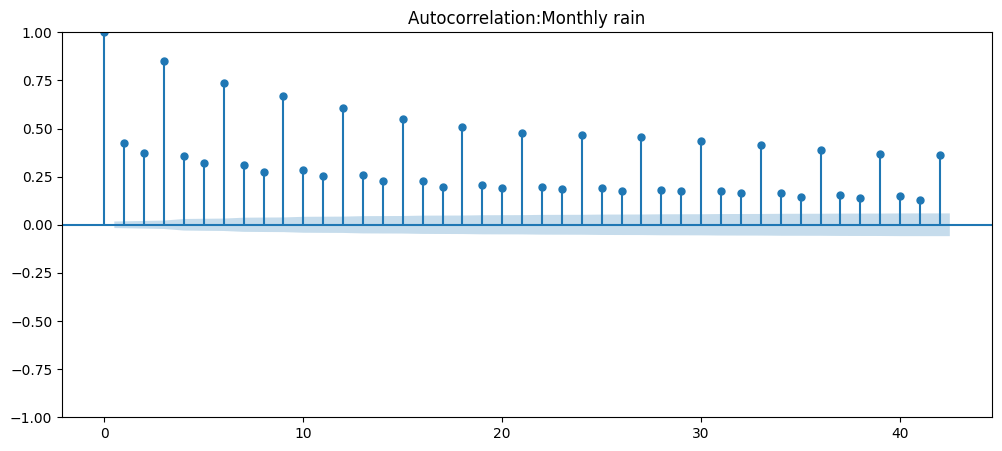

In [28]:
title = 'Autocorrelation:Monthly rain'
plot_acf(rain,title=title)

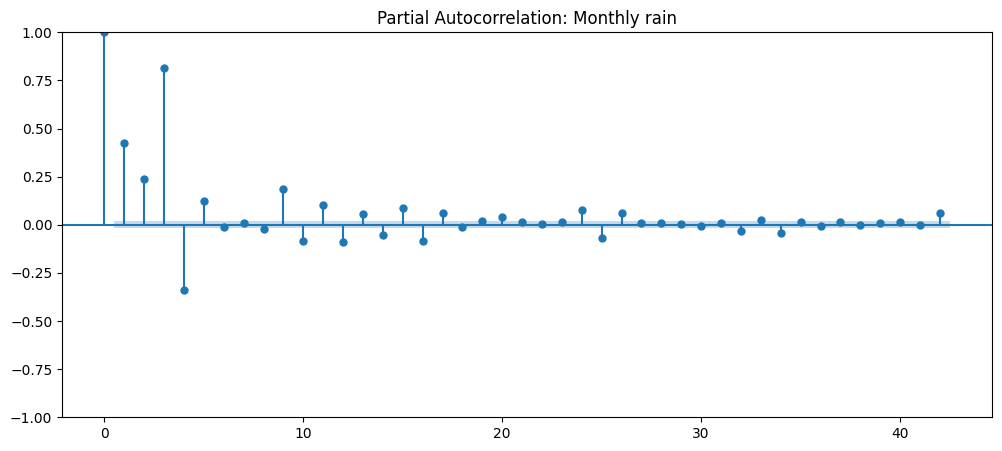

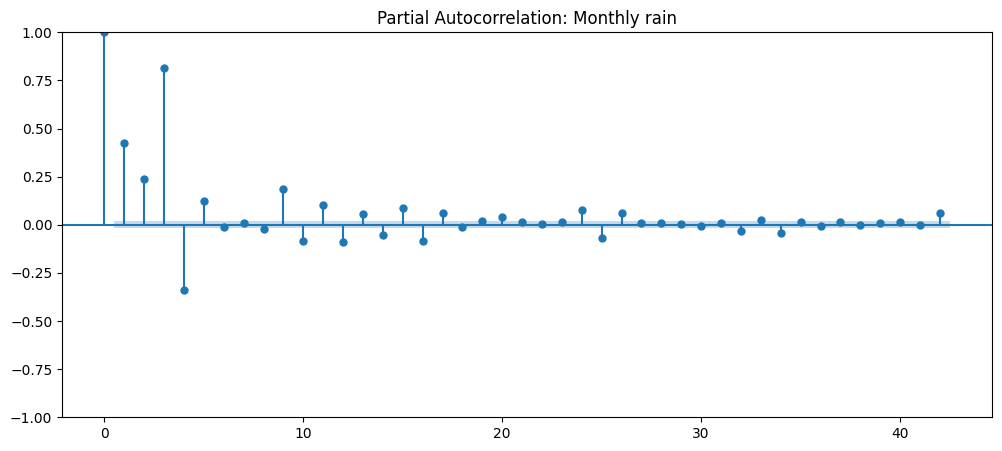

In [29]:
title='Partial Autocorrelation: Monthly rain'
plot_pacf(rain,title=title)

In [30]:
!pip install pmdarima


In [31]:
from pmdarima import auto_arima  
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [34]:
chunk_size = 5000
for start in range(0, len(rain['RAINFALL']), chunk_size):
    end = start + chunk_size
    batch_data = rain['RAINFALL'][start:end]
    # Process the batch


In [35]:
import pmdarima as pm

model = pm.auto_arima(rain['RAINFALL'], seasonal=True, m=12, stepwise=True)


In [ ]:
model = SARIMAX(train_data['RAINFALL'],order=(1,0,0),seasonal_order=(2,0,[1],12))
results = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

NameError: name 'train_data' is not defined

In [ ]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test_data['RAINFALL'][i]}")

KeyError: 0

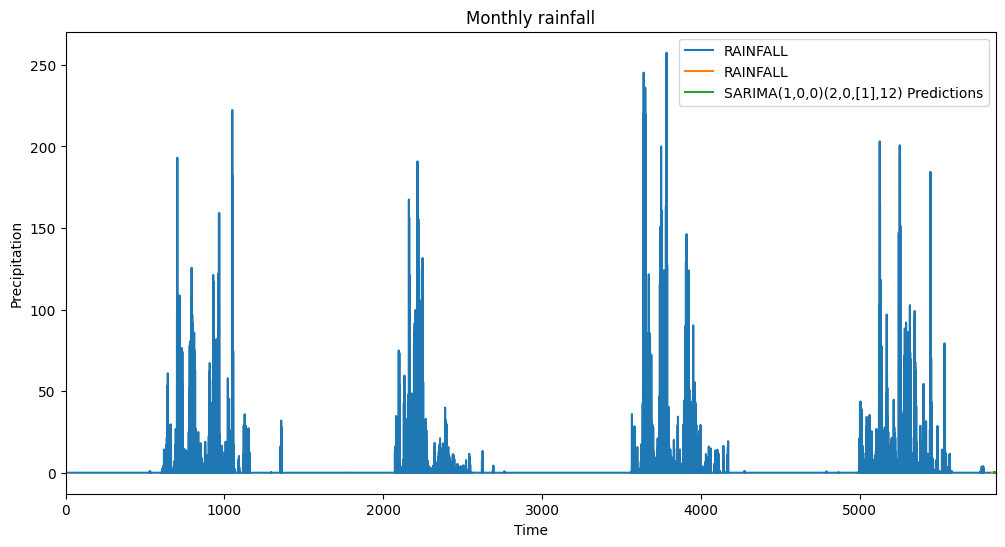

In [ ]:
title = 'Monthly rainfall'
ylabel='Precipitation'
xlabel='Time'

ax =train_data["RAINFALL"].plot(legend = True)
test_data['RAINFALL'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

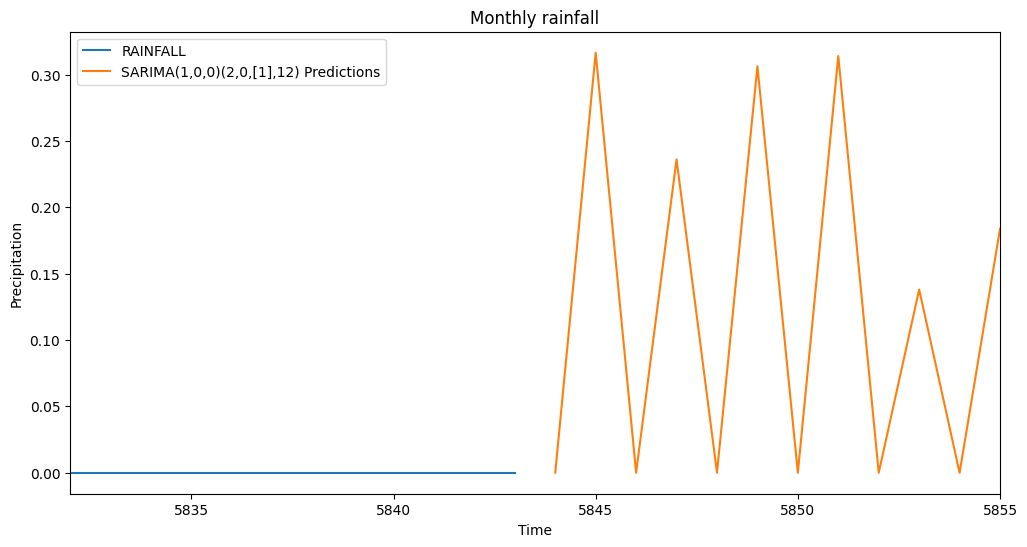

In [ ]:
# Plot predictions against known values
title = 'Monthly rainfall'
ylabel='Precipitation'
xlabel='Time'

ax = test_data['RAINFALL'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
metrics(test_data["RAINFALL"],predictions)


MAE:  0.12453689851379368
MSE:  0.033417286524718356
RMSE:  0.18280395653463946


NotImplementedError: 